In [4]:
import os
import pandas as pd
import numpy as np
import re

#Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 7.0)
import seaborn as sns
pd.options.mode.chained_assignment = None
from scipy.signal import argrelmin

In [3]:
def processData(game_id):
    os.chdir("F:/CSV DATA")
    #Read in the data, avoid warnings
    motion=pd.read_csv("00"+str(game_id)+".csv",low_memory=False)
    #Remove any rows where there are NaN values
    motion=motion[motion.isnull().any(axis=1)==False].reset_index(drop=True)
    #Remove "stationary" events, such as free throws
    motion=motion.drop_duplicates(subset = ['quarter', 'sec_in_quarter', 'shot_clock'], keep = 'last').reset_index(drop=True)
    return(motion)

In [5]:
motion=processData(21500592)

In [6]:
def sup(a,c):
    try:
        sup=a[a>=c][0]
    except IndexError:
        return(0)
    return(sup)

def boundSup(a,b,c):
    vec_sup=np.array([sup(a,bvals) for bvals in b])
    vec_bounds=abs(vec_sup-b)
    vec_sup=np.unique(vec_sup[(vec_bounds<=c)&(vec_bounds>0)])
    return(vec_sup)

def infi(a,c):
    try:
        inf=a[a<=c][-1]
    except IndexError:
        return(0)
    return(inf)

def boundInf(a,b,c):
    vec_inf=np.array([infi(a,bvals) for bvals in b])
    vec_bounds=abs(vec_inf-b)
    vec_inf=np.unique(vec_inf[(vec_bounds<=c)&(vec_bounds>0)])
    return(vec_inf)

In [9]:
from scipy.signal import argrelmin,argrelmax

In [116]:
def findSupInts(motion):
    z_min=argrelmin(motion.ball_z.values)[0]
    z_min=z_min[np.in1d(z_min,np.where(motion.ball_z<10)[0])]
    z_max=argrelmax(motion.ball_z.values)[0]
    z_max=z_max[np.in1d(z_max,np.where(motion.ball_z>=10)[0])]
    lower_bound=boundInf(z_min,z_max,75)
    middle_bound=boundSup(z_max,z_min,75)
    upper_bound=boundSup(z_min,middle_bound,75)
    return(np.vstack((lower_bound,middle_bound,upper_bound)).T)

In [117]:
findSupInts(motion)

array([[  272,   295,   315],
       [  315,   325,   356],
       [  738,   759,   783],
       [ 1160,  1188,  1235],
       [ 1393,  1424,  1466],
       [ 1841,  1867,  1910],
       [ 2249,  2278,  2317],
       [ 2493,  2518,  2560],
       [ 3053,  3089,  3124],
       [ 3424,  3450,  3483],
       [ 3682,  3692,  3729],
       [ 3864,  3891,  3940],
       [ 4049,  4075,  4128],
       [ 4255,  4258,  4281],
       [ 4768,  4793,  4832],
       [ 5376,  5378,  5387],
       [ 5426,  5452,  5478],
       [ 5719,  5753,  5813],
       [ 5825,  5854,  5888],
       [ 6078,  6118,  6146],
       [ 6367,  6395,  6431],
       [ 6812,  6838,  6884],
       [ 7086,  7098,  7132],
       [ 7207,  7232,  7275],
       [ 7549,  7566,  7576],
       [ 7594,  7603,  7632],
       [ 8133,  8174,  8219],
       [ 8222,  8238,  8271],
       [ 8298,  8303,  8336],
       [ 8532,  8539,  8573],
       [ 8874,  8902,  8925],
       [ 9514,  9519,  9530],
       [ 9834,  9857,  9874],
       [ 9

In [12]:
argrelmin(motion.ball_x.values)

(array([    8,    13,    15, ..., 71668, 71670, 71672], dtype=int64),)

In [23]:
z_min=argrelmin(motion.ball_z.values)[0]
z_min=z_min[np.in1d(z_min,np.where(motion.ball_z<10)[0])]
z_max=argrelmax(motion.ball_z.values)[0]
z_max=z_max[np.in1d(z_max,np.where(motion.ball_z>=10)[0])]

In [41]:
shot_ints=np.vstack((boundInf(z_min,z_max,75),boundSup(z_max,z_min,75))).T

In [84]:
shot_ints2=np.vstack((shot_ints[:,0],shot_ints[:,1],boundSup(z_min,shot_ints[:,1],75))).T

In [63]:
lhoop=np.linalg.norm(motion.iloc[:,4:6].values-np.array([5,25]),axis=1)
rhoop=np.linalg.norm(motion.iloc[:,4:6].values-np.array([89,25]),axis=1)

In [91]:
shot_z_mins=np.array([np.min(np.hstack((lhoop[np.arange(s[0],s[2])],rhoop[np.arange(s[0],s[2])]))) for s in shot_ints2])

In [110]:
shot_ints3=shot_ints2[np.where(shot_z_mins<=2)[0],:]

In [111]:
shot_index=np.hstack([np.arange(s[0],s[2]) for s in shot_ints3])

[]

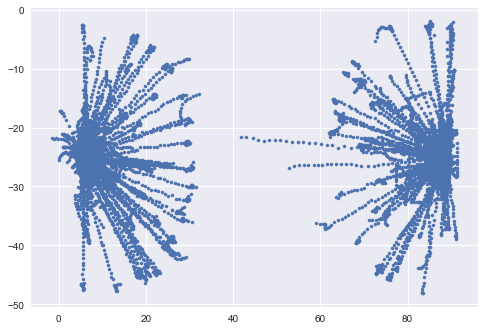

In [115]:
plt.scatter(x=motion.ball_x[shot_index],y=-motion.ball_y[shot_index],s=10)
plt.plot()

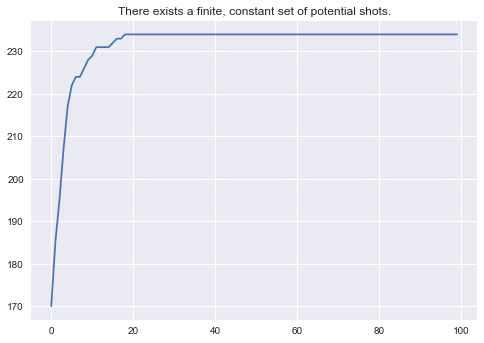

In [34]:
plt.plot(np.array([len(boundInf(z_min,z_max,i)) for i in range(25,125)]))
plt.title("There exists a finite, constant set of potential shots.")
plt.show()